<a href="https://colab.research.google.com/github/Ahd-Rizlan/Machine-Learning/blob/Notebook-02/Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Pandas on Notebook-02

In [ ]:
!pip install pandas

# Import Required Libraries

In [ ]:
import pandas as pd
#Importing Ploty to plot Diagrams
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


## Loading CSV to DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML-CW/Mortality_Status.csv')

Checking the shape - [colums and Rows] of the dataset

In [ ]:
df.shape

(3262, 14)

Checking the Data contents

In [ ]:
#displaying first five rows
df.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,50.0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,58.0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,58.0,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,47.0,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


List Of Columns in CW dataset

In [ ]:
# Program to print all the column names of the data_frame
list(df.columns)

['Age',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months',
 'Mortality_Status']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3262 non-null   float64
 1   T_Stage                 3262 non-null   object 
 2   N_Stage                 3262 non-null   object 
 3   6th_Stage               3262 non-null   object 
 4   Differentiated          3262 non-null   object 
 5   Grade                   3262 non-null   int64  
 6   A_Stage                 3262 non-null   object 
 7   Tumor_Size              3262 non-null   float64
 8   Estrogen_Status         3262 non-null   object 
 9   Progesterone_Status     3262 non-null   object 
 10  Regional_Node_Examined  3262 non-null   float64
 11  Reginol_Node_Positive   3262 non-null   int64  
 12  Survival_Months         3262 non-null   int64  
 13  Mortality_Status        3262 non-null   object 
dtypes: float64(3), int64(3), object(8)
memor

Null Check

In [ ]:
df.isnull().sum()

,0
Age,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0
Progesterone_Status,0


## Data Pre-Processing

We have no Nulls and Outliers are removes , now we have to standaize

1st we have to Transform Objects to Numbers if not we cant use it on Classifications

In [ ]:
df['T_Stage']= df['T_Stage'].map({'T1':1,'T2':2,'T3':3,'T4':4})
df['N_Stage']= df['N_Stage'].map({'N1':1,'N2':2,'N3':3})
df['6th_Stage']= df['6th_Stage'].map({'IIA':1,'IIIA':2,'IIB':3,'IIIB':4,'IIIC':5})
df['A_Stage']= df['A_Stage'].map({'Regional':1,'Distant':2})
df['Mortality_Status']= df['Mortality_Status'].map({'Alive':1,'Dead':0})
df['Progesterone_Status']= df['Progesterone_Status'].map({'Positive':1,'Negative':0})
df['Estrogen_Status']= df['Estrogen_Status'].map({'Positive':1,'Negative':0})
df['Differentiated'] = df['Differentiated'].map({'Undifferentiated':0,'Poorly differentiated':1,'Moderately differentiated':2,'Well differentiated':3})


Then we have to take the Feature Columns and targeted feature

In [ ]:
feature_columns = ['Age','T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Tumor_Size','Estrogen_Status','Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive']
X = df[feature_columns] # Features
y = df['Mortality_Status'] #Targeted Features

Splitting Data into Train and Test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('WholeData',df.shape)
print('TrainData',X_train.shape)
print('TestData',X_test.shape)


WholeData (3262, 14)
TrainData (2609, 12)
TestData (653, 12)


In [ ]:
SS = StandardScaler()
X_train_ScaledData = SS.fit_transform(X_train)
X_test_ScaledData = SS.transform(X_test)

There are different Magnitudes in the dataset , this can be affect the logistic regression (Classification) we have to Standadize those using sklearn StandardScaler

Xscale = X-mean/std

In [ ]:
scaled_df = pd.DataFrame(X_train_ScaledData, columns=feature_columns)

# View first few rows
print(scaled_df.head())


        Age   T_Stage   N_Stage  6th_Stage  Differentiated     Grade  A_Stage  \
0  0.341839  0.499010 -0.507128   1.096334       -1.409335  1.409335 -0.09008   
1  0.902051  1.965134 -0.507128   0.003351        0.176243 -0.176243 -0.09008   
2  0.790009  0.499010 -0.507128   1.096334        0.176243 -0.176243 -0.09008   
3 -0.218373  0.499010  1.838788   0.003351       -1.409335  1.409335 -0.09008   
4  1.686349 -0.967113 -0.507128  -1.089631       -1.409335  1.409335 -0.09008   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0   -0.060131         0.234508             0.433046               -0.989281   
1    2.555727         0.234508             0.433046               -0.008698   
2   -0.060131         0.234508             0.433046               -1.409531   
3    1.316636         0.234508             0.433046                0.131385   
4   -0.404323         0.234508             0.433046                1.111968   

   Reginol_Node_Positive  
0          

# **Implemant GaussianNB**

In [ ]:
# instantiate the model
# BCSD_NB_model = GaussianNB()
BCSD_NB_model = GaussianNB(priors=[0.5,0.5])

BCSD_NB_model.fit(X_train_ScaledData, y_train)


GaussianNB(priors=[0.5, 0.5])

Predicting the Unseen Data

In [ ]:
y_Nb_predicted = BCSD_NB_model.predict(X_test_ScaledData)

Confusion Matrix For Naive Bais

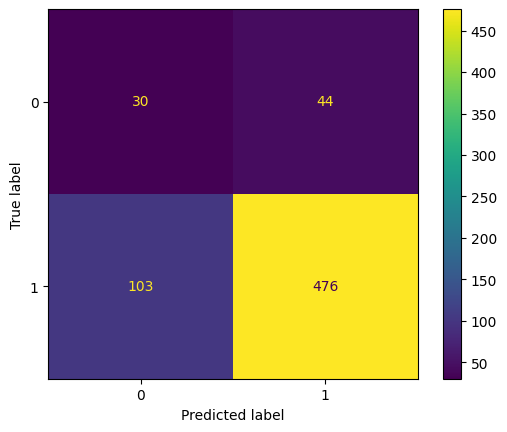

In [ ]:
# Construct the confusion matrix cm
cm_for_NB = confusion_matrix(y_test, y_Nb_predicted, labels=BCSD_NB_model.classes_)
# Create a display to plot the confusion matrix
display_cm_for_NB = ConfusionMatrixDisplay(cm_for_NB,display_labels=BCSD_NB_model.classes_)
display_cm_for_NB.plot()


Classification Report For NB

In [ ]:
print(classification_report(y_test,y_Nb_predicted))


              precision    recall  f1-score   support

           0       0.23      0.41      0.29        74
           1       0.92      0.82      0.87       579

    accuracy                           0.77       653
   macro avg       0.57      0.61      0.58       653
weighted avg       0.84      0.77      0.80       653



ROC Curve For NB

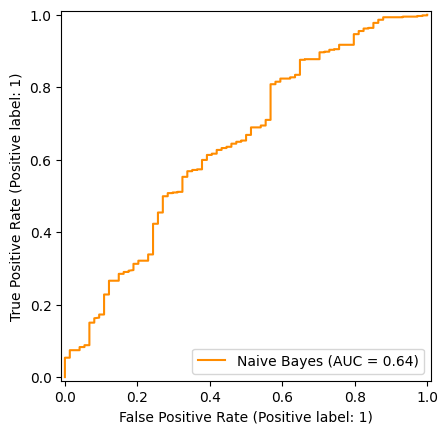

In [ ]:
# Apply the function by specifying the name of your model and test data.
# Roc_For_NB = RocCurveDisplay.from_estimator(nb_model, X_test_ScaledData, y_test)
RocCurveDisplay.from_estimator(BCSD_NB_model, X_test_ScaledData, y_test, name="Naive Bayes", color='darkorange')


# **Implemant Logistic Regesstion**

In [ ]:
# instantiate the model
BCSD_LR_Model = LogisticRegression(class_weight='balanced')
# BCSD_LR_Model = LogisticRegression()

#Training The Module
BCSD_LR_Model.fit(X_train_ScaledData,y_train)

LogisticRegression(class_weight='balanced')

The Slope and the Gradient that got from Training the Model

In [ ]:
BCSD_LR_Model_slope = BCSD_LR_Model.coef_
BCSD_LR_Model_intercept = BCSD_LR_Model.intercept_
print('Slope', BCSD_LR_Model_slope)
print('Intercept', BCSD_LR_Model_intercept)

Slope [[-0.26186128 -0.16482857 -0.07246685 -0.12623657  0.18758542 -0.18758542
  -0.00345975 -0.04278619  0.11493874  0.18674605  0.24207819 -0.2444429 ]]
Intercept [0.21138715]


In [ ]:
#Now make predictions
y_LR_predicted = BCSD_LR_Model.predict(X_test_ScaledData)

In [ ]:
# #To see the Results of this we can say
# y_LR_predicted

In [ ]:
Comparison_df = pd.DataFrame({'Actual_Mortality_Status':y_test,'Predicted_Mortality_Status':y_LR_predicted})
Comparison_df


,Actual_Mortality_Status,Predicted_Mortality_Status
2193,1,0
820,1,1
2943,0,1
1856,1,1
719,1,1
...,...,...
2402,1,0
705,1,0
2509,1,1
159,1,0


Now we have to Plot the Confusion MAtrix to see how well our model Perfomed

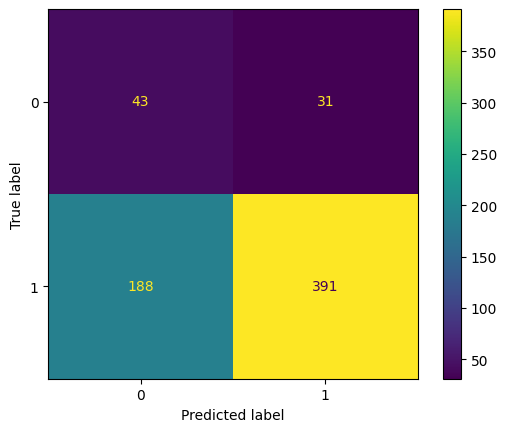

In [ ]:
# Construct the confusion matrix cm
cm_for_LR = confusion_matrix(y_test, y_LR_predicted, labels=BCSD_LR_Model.classes_)
# Create a display to plot the confusion matrix
display_cm_for_LR = ConfusionMatrixDisplay(cm_for_LR,display_labels=BCSD_LR_Model.classes_)
display_cm_for_LR.plot()


**logisticRegression Results **

True Label is True And Predicted True(Positive) - *True Positive*  - 568

True Label is False And Predicted True(Positive) - *False Positive*  - 81

True Label is True And Predicted False(Negative) - *True Negative*  - 3

True Label is False And Predicted False(Negative) - *False Negative*  - 1

Patient Who have Alive and Predicted Alive = 568

Patient Who Have Dead But Predicted as Alive = 81

Patient Who are Alive But Predicted as Dead = 3

Patient Who are Dead And Predicted as Dead = 1



---


Now We can Take Accuracy Score

Accuracy Score  =  Total Correct Predictions /  All Predictions

In [ ]:
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_LR_predicted)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

# y_Train_predicted = BCSD_Model.predict(X_train_ScaledData)
# accuracy_train = accuracy_score(y_train,y_Train_predicted)
# print ('The Logistic Regression Model Accuracy:',accuracy_train)

The Logistic Regression Model Accuracy: 0.664624808575804


This suggest that the Accuracy of this Model is 87%

In [ ]:
print(classification_report(y_test,y_LR_predicted))

# print(classification_report(y_train,y_Train_predicted))

              precision    recall  f1-score   support

           0       0.19      0.58      0.28        74
           1       0.93      0.68      0.78       579

    accuracy                           0.66       653
   macro avg       0.56      0.63      0.53       653
weighted avg       0.84      0.66      0.72       653



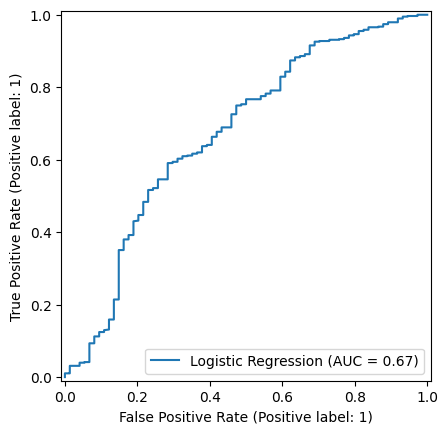

In [ ]:
# Apply the function by specifying the name of your model and test data.
Roc_For_LR = RocCurveDisplay.from_estimator(BCSD_LR_Model, X_test_ScaledData, y_test, name="Logistic Regression")

# Logreg_roc2 = RocCurveDisplay.from_estimator(BCSD_Model, X_train_ScaledData, y_train)

# **Finding a Good Hyperparameter**

Gridsearch CV

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
# param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ['euclidean', 'manhattan']}
# param_grid = {'n_neighbors': np.arange(1, 35), 'metric': ['euclidean', 'manhattan'],'weights': ['uniform', 'distance']
# }

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': np.arange(1, 50),
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights': ['uniform', 'distance']
}



BCSD_knn_gscv = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)


#use gridsearch to test all values for n_neighbors
# BCSD_knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')


#fit model to data
BCSD_knn_gscv.fit(X_train_ScaledData,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
# Check top performing n_neighbors’ value
BCSD_knn_gscv.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': np.int64(4),
 'knn__weights': 'uniform'}

# **Implemant KNN**

In [ ]:
# Perform testing on test dataset
y_BCSD_knn_gscv_predicted = BCSD_knn_gscv.predict(X_test_ScaledData)

              precision    recall  f1-score   support

           0       0.17      0.47      0.25        74
           1       0.91      0.70      0.79       579

    accuracy                           0.68       653
   macro avg       0.54      0.59      0.52       653
weighted avg       0.83      0.68      0.73       653



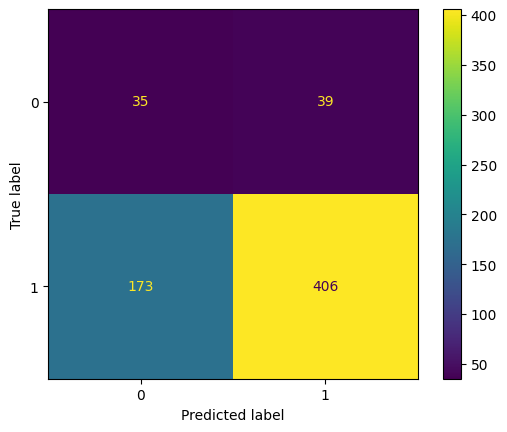

In [ ]:
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_BCSD_knn_gscv_predicted, labels = BCSD_knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=BCSD_knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_BCSD_knn_gscv_predicted))



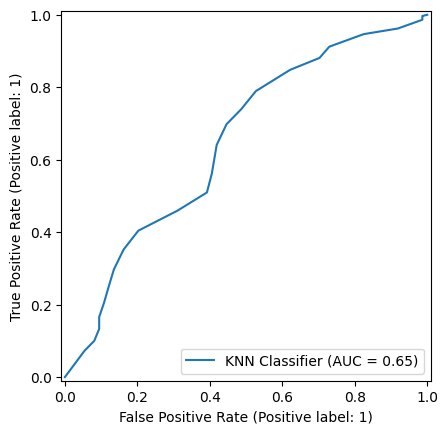

In [ ]:
# Apply the function by specifying the name of your model and test data.
Roc_For_KNN = RocCurveDisplay.from_estimator(BCSD_knn_gscv, X_test_ScaledData, y_test, name="KNN Classifier")

